# Exercício prático do Capítulo 5
### Diógenes Wallis de França Silva

#### Acessando os arquivos do Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Carregando as bibliotecas

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

from matplotlib import rcParams

%matplotlib inline

### Etapa 1

In [ ]:
url = "https://raw.githubusercontent.com/Wallis16/Processamento-de-Imagem/main/Exc2/strawberries_coffee_noise.png"

img = io.imread(url)

(600, 600, 3)


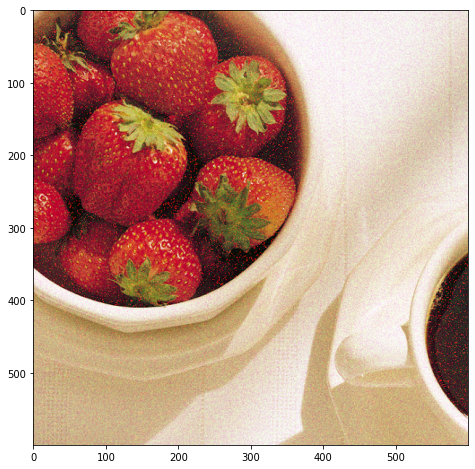

In [ ]:
rcParams['figure.figsize'] = 15,8

print(img.shape)
imgplot = plt.imshow(img)

#### Comparando canal a canal na imagem "strawberries_coffee" 

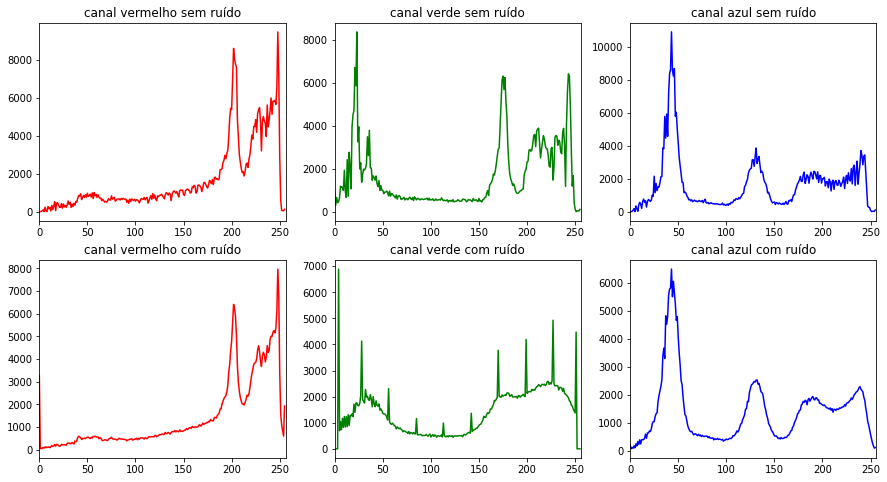

In [ ]:
url = "https://raw.githubusercontent.com/Wallis16/Processamento-de-Imagem/main/Exc2/strawberries_coffee.png"
img_strawberries_coffee = io.imread(url)

hist_red_strawberries_coffee = cv2.calcHist([img_strawberries_coffee],[0],None,[256],[0,256])
hist_green_strawberries_coffee = cv2.calcHist([img_strawberries_coffee],[1],None,[256],[0,256])
hist_blue_strawberries_coffee = cv2.calcHist([img_strawberries_coffee],[2],None,[256],[0,256])

url = "https://raw.githubusercontent.com/Wallis16/Processamento-de-Imagem/main/Exc2/strawberries_coffee_noise.png"
img_strawberries_coffee_noise = io.imread(url)

hist_red_strawberries_coffee_noise = cv2.calcHist([img_strawberries_coffee_noise],[0],None,[256],[0,256])
hist_green_strawberries_coffee_noise = cv2.calcHist([img_strawberries_coffee_noise],[1],None,[256],[-5,260])
hist_blue_strawberries_coffee_noise = cv2.calcHist([img_strawberries_coffee_noise],[2],None,[256],[0,256])

plt.subplot(231)
plt.title("canal vermelho sem ruído")
plt.plot(hist_red_strawberries_coffee,color = 'r')
plt.xlim([0,256])

plt.subplot(232)
plt.title("canal verde sem ruído")
plt.plot(hist_green_strawberries_coffee,color = 'g')
plt.xlim([0,256])

plt.subplot(233)
plt.title("canal azul sem ruído")
plt.plot(hist_blue_strawberries_coffee,color = 'b')
plt.xlim([0,256])

plt.subplot(234)
plt.title("canal vermelho com ruído")
plt.plot(hist_red_strawberries_coffee_noise,color = 'r')
plt.xlim([0,256])

plt.subplot(235)
plt.title("canal verde com ruído")
plt.plot(hist_green_strawberries_coffee_noise,color = 'g')
plt.xlim([0,256])

plt.subplot(236)
plt.title("canal azul com ruído")
plt.plot(hist_blue_strawberries_coffee_noise,color = 'b')
plt.xlim([0,256])

plt.show()

#### Comparando canal a canal na imagem com a barra de cores

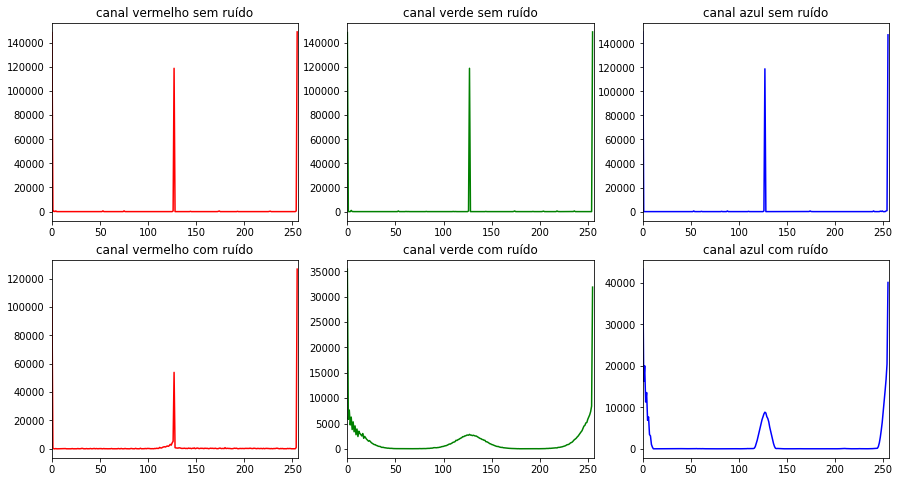

In [ ]:
url = "https://raw.githubusercontent.com/Wallis16/Processamento-de-Imagem/main/Exc2/color_bar.png"
img_color_bar = io.imread(url)

hist_red_color_bar = cv2.calcHist([img_color_bar],[0],None,[256],[0,256])
hist_green_color_bar = cv2.calcHist([img_color_bar],[1],None,[256],[0,256])
hist_blue_color_bar = cv2.calcHist([img_color_bar],[2],None,[256],[0,256])

url = "https://raw.githubusercontent.com/Wallis16/Processamento-de-Imagem/main/Exc2/bar_noise.png"
img_bar_noise = io.imread(url)

hist_red_bar_noise = cv2.calcHist([img_bar_noise],[0],None,[256],[0,256])
hist_green_bar_noise = cv2.calcHist([img_bar_noise],[1],None,[256],[0,256])
hist_blue_bar_noise = cv2.calcHist([img_bar_noise],[2],None,[256],[0,256])

plt.subplot(231)
plt.title("canal vermelho sem ruído")
plt.plot(hist_red_color_bar,color = 'r')
plt.xlim([0,256])

plt.subplot(232)
plt.title("canal verde sem ruído")
plt.plot(hist_green_color_bar,color = 'g')
plt.xlim([0,256])

plt.subplot(233)
plt.title("canal azul sem ruído")
plt.plot(hist_blue_color_bar,color = 'b')
plt.xlim([0,256])

plt.subplot(234)
plt.title("canal vermelho com ruído")
plt.plot(hist_red_bar_noise,color = 'r')
plt.xlim([0,256])

plt.subplot(235)
plt.title("canal verde com ruído")
plt.plot(hist_green_bar_noise,color = 'g')
plt.xlim([0,256])

plt.subplot(236)
plt.title("canal azul com ruído")
plt.plot(hist_blue_bar_noise,color = 'b')
plt.xlim([0,256])

plt.show()

##### Para a análise serão considerados os histogramas tanto na imagem com os morangos quanto na barra de cores.

##### Analisando canal a canal, tem-se que no canal vermelho o ruído deve ser do tipo sal, pimenta, ou sal e pimenta, uma vez que o histograma no canal ruidoso nas barras de cores são impulsos, porém, observando os histogramas, percebe-se que as componentes de valor zero diminuíram, enquanto que as de cor branca aumentaram, logo considera-se o ruído como do tipo sal. 

##### Já para os canais azul e verde, observando os resultados nas imagens com barra de cores, o ruído é semelhante a uma gaussiana. Porém, a variância é mais acentuada no canal verde e também é possível ver no histograma da imagem com os morangos que as componentes nulas aumentaram, indicando um ruído com componentes de impulso.

# Etapa 2

##### Definindo os filtros a serem utilizados

In [ ]:
#filtros implementados na aula prática do capítulo 5

def get_contra_harmonic_pixel(src, x, y, Q, M):
    
    numerator    = np.sum(np.power(src[y-M: y+M, x-M:x+M], Q+1))
    denominator = np.sum(np.power(src[y-M: y+M, x-M:x+M], Q))

    if   denominator == 0 and numerator == 0: return 0
    if   denominator == 0 : return 255
    if   numerator    == np.inf and denominator != np.inf: return 255
    if   numerator    == np.inf or denominator == np.inf: return 0
    if   numerator    != numerator or denominator != denominator: return 0 #check nan

    filter_val  = numerator/denominator
    
    return filter_val


def apply_contra_harmonic_filter(src, Q, M, use_float=False):
    if use_float:
      src = src/255.0
    src_w_border      = cv2.copyMakeBorder(src, M, M, M, M, borderType=cv2.BORDER_REFLECT)
    dst                       = np.ones_like(src_w_border) * 255
    height, width, *_  = src_w_border.shape

    for col in (range(M, width-M)):
        for row in range(M, height-M):
            dst[row, col] = get_contra_harmonic_pixel(src_w_border, col, row, Q, M)
    dst = dst[M:height-M, M:width-M]

    if use_float:
      return (dst *255).astype(np.uint8)
    
    return dst

In [ ]:
def get_neighborhood(src, x, y, m):
    neigh = src[y-m: y+m+1, x-m:x+m+1] 
    return neigh

def get_min_med_max(neigh):
    min_val   = np.min(neigh)
    med_val  = np.median(neigh)
    max_val  = np.max(neigh)
    
    return min_val, med_val, max_val


def adaptive_median_filter(src, M_MAX):
    src_noise_wb      = cv2.copyMakeBorder(src, M_MAX, M_MAX, M_MAX, M_MAX, borderType=cv2.BORDER_REFLECT).astype(np.int)
    dst               = np.zeros_like(src_noise_wb, dtype=np.int)
    height, width, *_ = dst.shape

    for col in (range(M_MAX, width-M_MAX)):
        for row in range(M_MAX, height-M_MAX):
            dst[row, col] = stage_A(src_noise_wb, col, row, M_MAX)
        
    dst = dst[M_MAX:height-M_MAX, M_MAX:width-M_MAX]
    return dst

def stage_A(src, x, y, M_MAX, m=1): # Análise da mediana
    neigh             = get_neighborhood(src, x, y, m)
    zmin, zmed, zmax  = get_min_med_max(neigh)
    A1 = zmed - zmin
    A2 = zmed - zmax

    if A1 > 0 and A2 < 0:  # min < median < max
        return stage_B(src, x, y, m)  # A mediana não é um impulso, va para o estagio B
    
    if m < M_MAX:  # A mediana é um impulso, aumente a janela 
        return stage_A(src, x, y, M_MAX, m+1)
    else:
        return zmed

def stage_B(src, x, y, m):
    neigh            = get_neighborhood(src, x, y, m)
    zmin, zmed, zmax = get_min_med_max(neigh)
    zcurr            = src[y, x] 
    
    B1 = zcurr - zmin
    B2 = zcurr - zmax
    if B1 > 0 and B2 < 0: # min < pixel atual < max
        return zcurr            # O pixel atual não é um impulso, retorne ele

    return zmed  # O pixel atual é um impulso, retorne a mediana.
    # Sabemos no estagio A que a mediana não é um impulso

##### No canal vermelho é usado um filtro contra harmônica com Q = -4.5 para remoção de ruído do tipo sal.

##### Canal verde utiliza um filtro de mediana adaptativo, já que o ruído contém componentes de impulso e também uma gaussiana.

##### Por último, o canal azul utiliza um filtro de média aritmética (fazendo Q = 0 no contra harmônica), visto que o ruído se assemelha a uma gaussiana.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  


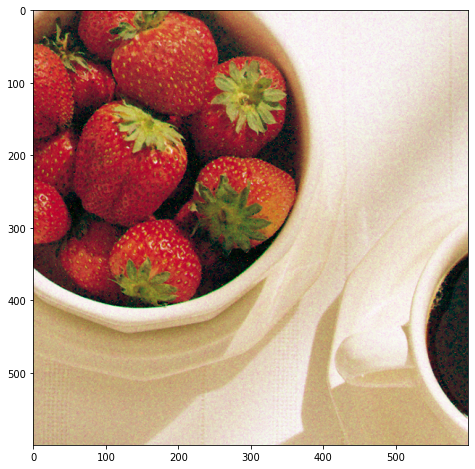

In [ ]:
#noise_src = cv2.imread("/content/drive/MyDrive/CIn/Mestrado/2021.1/Processamento de Imagem/Exercícios práticos/ex2/strawberries_coffee_noise.png")[:,:,::-1]

red = img_strawberries_coffee_noise[:, :, 0]
green = img_strawberries_coffee_noise[:, :, 1]
blue = img_strawberries_coffee_noise[:, :, 2]

Q, M = -4.5, 1

filtered_red_channel = apply_contra_harmonic_filter(red, Q, M)

filtered_green_channel = adaptive_median_filter(green, 2)

Q, M = 0, 1

filtered_blue_channel = apply_contra_harmonic_filter(blue, Q, M)

filtered_image_strawberries = img_strawberries_coffee_noise.copy()

filtered_image_strawberries[:, :, 0] = filtered_red_channel
filtered_image_strawberries[:, :, 1] = filtered_green_channel
filtered_image_strawberries[:, :, 2] = filtered_blue_channel

plt.imshow(filtered_image_strawberries)

In [ ]:
#Salvando a imagem em MyDrive, caso deseje salvar em outro diretório, basta alterar a variável 'path'

path = "/content/gdrive/MyDrive/"
cv2.imwrite("/content/gdrive/MyDrive/filtered_image.png",filtered_image_strawberries[:,:,::-1])

False

# Etapa 3

##### A comparação é feita tanto na imagem com a barra de cores, quanto na imagem com os morangos.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  


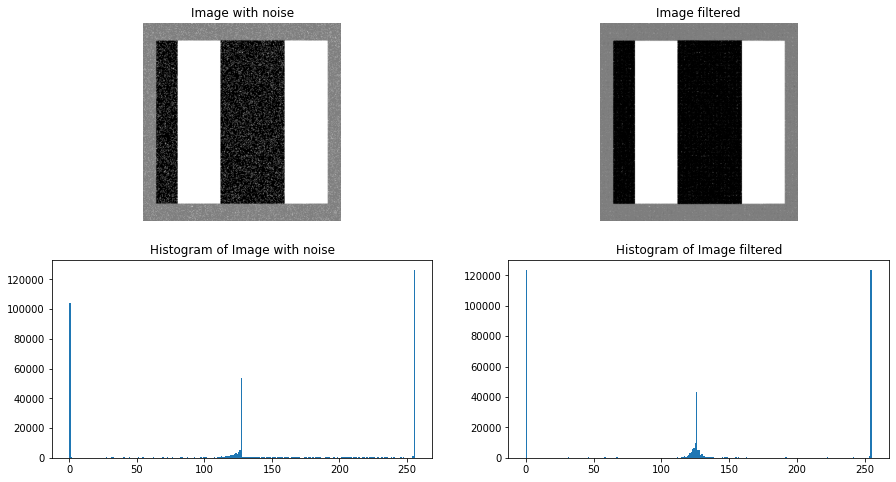

In [ ]:
r = img_bar_noise[:, :, 0]

Q, M = -4.5, 1

filtered_red_bar_noise = apply_contra_harmonic_filter(r, Q, M)

plt.subplot(221);plt.axis('off');plt.title("Image with noise");plt.imshow(r, cmap='gray')
plt.subplot(222);plt.axis('off');plt.title("Image filtered");plt.imshow(filtered_red_bar_noise, cmap='gray')

plt.subplot(223);plt.title("Histogram of Image with noise");plt.hist(r.ravel(), bins=256, range=(0, 256));
plt.subplot(224);plt.title("Histogram of Image filtered");plt.hist(filtered_red_bar_noise.ravel(), bins=256);

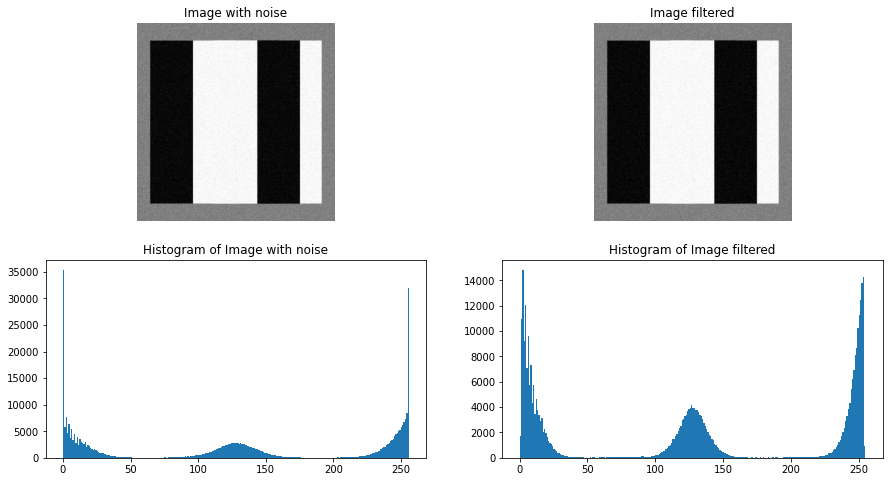

In [ ]:
g = img_bar_noise[:, :, 1]

filtered_green_bar_noise = adaptive_median_filter(g, 2)

plt.subplot(221);plt.axis('off');plt.title("Image with noise");plt.imshow(g, cmap='gray')
plt.subplot(222);plt.axis('off');plt.title("Image filtered");plt.imshow(filtered_green_bar_noise, cmap='gray')

plt.subplot(223);plt.title("Histogram of Image with noise");plt.hist(g.ravel(), bins=256, range=(0, 256));
plt.subplot(224);plt.title("Histogram of Image filtered");plt.hist(filtered_green_bar_noise.ravel(), bins=256);

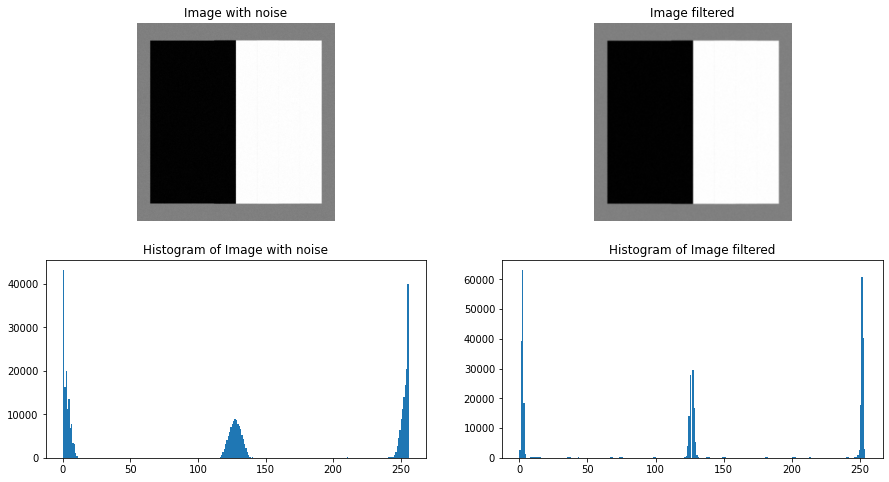

In [ ]:
b = img_bar_noise[:, :, 2]

Q, M = 0, 2

filtered_blue_bar_noise = apply_contra_harmonic_filter(b, Q, M)

plt.subplot(221);plt.axis('off');plt.title("Image with noise");plt.imshow(b, cmap='gray')
plt.subplot(222);plt.axis('off');plt.title("Image filtered");plt.imshow(filtered_blue_bar_noise, cmap='gray')

plt.subplot(223);plt.title("Histogram of Image with noise");plt.hist(b.ravel(), bins=256, range=(0, 256));
plt.subplot(224);plt.title("Histogram of Image filtered");plt.hist(filtered_blue_bar_noise.ravel(), bins=256);

###### No canal vermelho é possível perceber que o número de componentes nulas aumenta e a imagem também fica bem menos ruidosa. Já no canal verde o histograma se aproxima mais como um impulso, que é o caso na imagem sem ruído. Por último no canal azul acontece algo semelhante em que o histograma é bem mais próximo do impulso. Note que a visualização é bem mais simples na barra de corres, visto que o histograma também e mais simples.

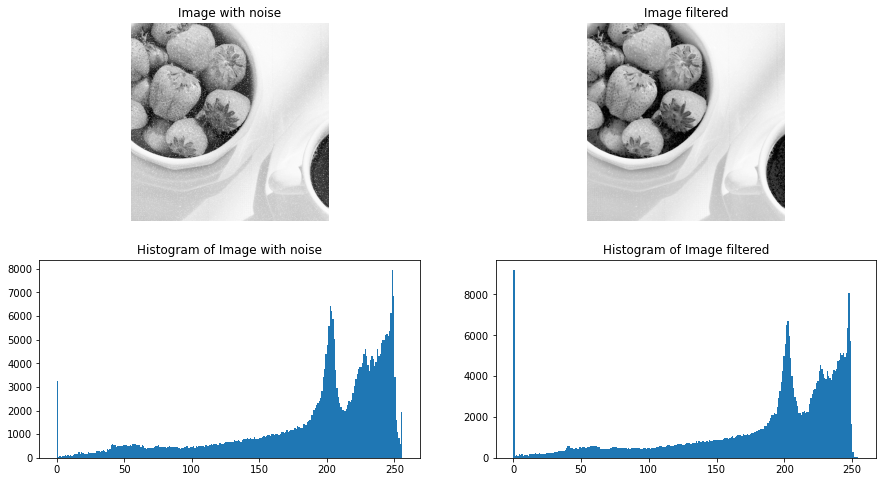

In [ ]:
plt.subplot(221);plt.axis('off');plt.title("Image with noise");plt.imshow(red, cmap='gray')
plt.subplot(222);plt.axis('off');plt.title("Image filtered");plt.imshow(filtered_red_channel, cmap='gray')

plt.subplot(223);plt.title("Histogram of Image with noise");plt.hist(red.ravel(), bins=256, range=(0, 256));
plt.subplot(224);plt.title("Histogram of Image filtered");plt.hist(filtered_red_channel.ravel(), bins=256);

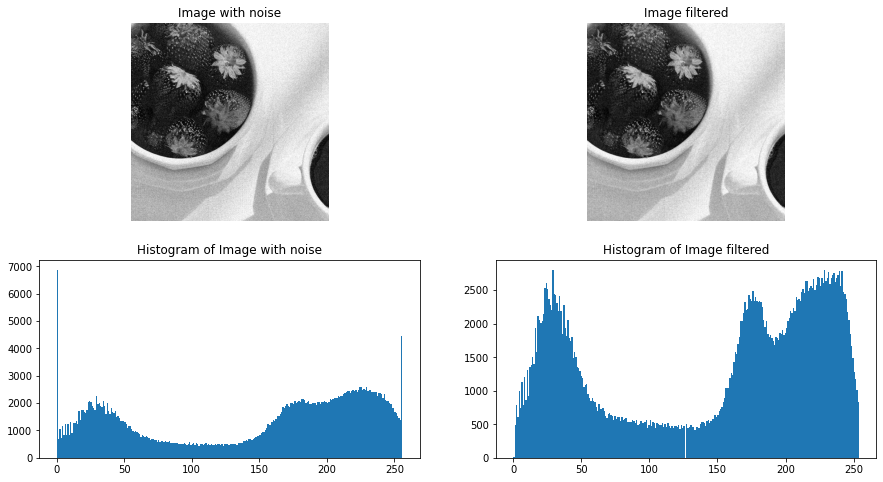

In [ ]:
plt.subplot(221);plt.axis('off');plt.title("Image with noise");plt.imshow(green, cmap='gray')
plt.subplot(222);plt.axis('off');plt.title("Image filtered");plt.imshow(filtered_green_channel, cmap='gray')

plt.subplot(223);plt.title("Histogram of Image with noise");plt.hist(green.ravel(), bins=256, range=(0, 256));
plt.subplot(224);plt.title("Histogram of Image filtered");plt.hist(filtered_green_channel.ravel(), bins=256);

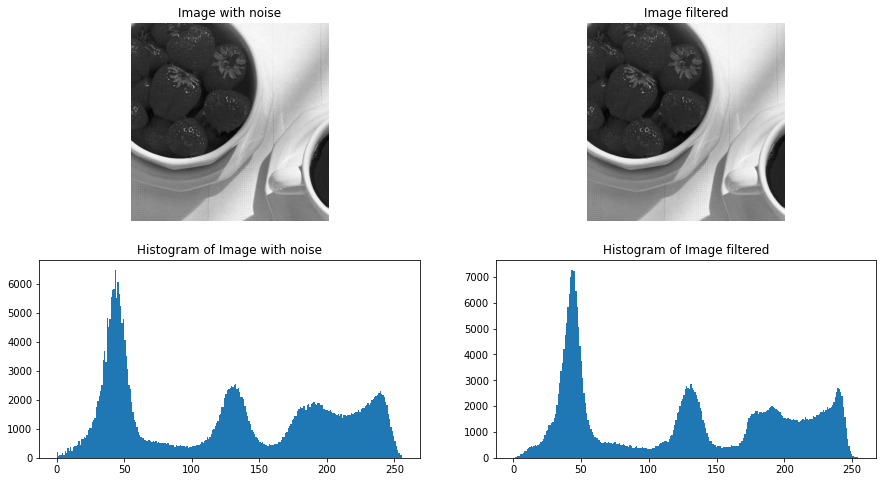

In [ ]:
plt.subplot(221);plt.axis('off');plt.title("Image with noise");plt.imshow(blue, cmap='gray')
plt.subplot(222);plt.axis('off');plt.title("Image filtered");plt.imshow(filtered_blue_channel, cmap='gray')

plt.subplot(223);plt.title("Histogram of Image with noise");plt.hist(blue.ravel(), bins=256, range=(0, 256));
plt.subplot(224);plt.title("Histogram of Image filtered");plt.hist(filtered_blue_channel.ravel(), bins=256);

##### No canal vermelho é possível visualizar que há um crescimento nas componentes nulas, justamente por ser um ruído do tipo sal, ao remover as componentes brancas as regiões escuras ficam mais visíveis. 

##### O canal verde tem a componente de valores nulos reduzida e o histograma também se aproxima mais da imagem original.

##### Para finalizar, o canal azul tem uma variação menor, mas também consegue se aproximar mais da imagem original. 

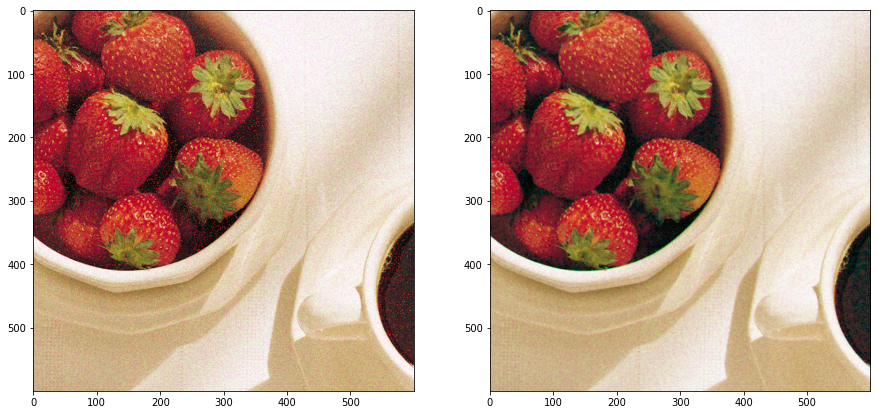

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_strawberries_coffee_noise);
ax[1].imshow(filtered_image_strawberries);

##### Comparando as imagens é possível visualizar que o ruído com os pontos vermelhos é bem reduzido e também há redução do ruído no fundo branco (para visualizar melhor a redução do ruído no fundo branco recomenda-se visualizar as imagens em um tamanho maior).